<h1 style="text-align: center;" class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home">EMPLOYEE CHURN ANALYSIS</h1>

# Importing Data
The dataset used for model building contained 1543 observations of 17 variables.

In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC

In [6]:
df = pd.read_csv(r'C:\Users\DELL\Documents\office_churn_dataset\office_churn_dataset.csv')

# The data contains the following attributes:

<li>1 - EmployeeID: A unique identifier for each employee.</li>
<li>2 - Tenure: The number of years the employee has been with the company.</li>
<li>3 - Salary: The employee's annual salary.</li>
<li>4 - Department: The department in which the employee works (e.g., Sales, Accounting, Customer Service).</li>
<li>5 - JobSatisfaction: The employee's self-reported job satisfaction level (on a scale from 1 to 5, with 5 being highly satisfied).</li>
<li>6 - WorkLifeBalance: The employee's self-reported work-life balance rating (on a scale from 1 to 5, with 5 being excellent).</li>
<li>7 - CommuteDistance: The distance the employee commutes to work (e.g., Short, Medium, Long).</li>
<li>8 - MaritalStatus: The marital status of the employee (e.g., Single, Married, Divorced).</li>
<li>9 - Education: The highest level of education attained by the employee (e.g., High School, Bachelor's, Master's).</li>
<li>10 - PerformanceRating: The employee's performance rating (on a scale from 1 to 5, with 5 being excellent).</li>
<li>11 - TrainingHours: The number of hours of training the employee has received.</li>
<li>12 - OverTime: Whether the employee works overtime or not.</li>
<li>13 - NumProjects: The number of projects the employee is currently working on.</li>
<li>14 - YearsSincePromotion: The number of years since the employee's last promotion.</li>
<li>15 - EnvironmentSatisfaction: The employee's self-reported environment satisfaction (on a scale from 1 to 5, with 5 being highly satisfied).</li>
<li>16 - Branch: The "Branch" feature represents the geographic location of each employee within one of the 12 Dunder Mifflin branches across the United States.</li>
<li>17 - Classes (Target Variable):
Employees will be classified into four classes based on their likelihood to leave the company:

Class A: Highly likely to leave.</li>
Class B: Moderately likely to leave.</li>
Class C: Slightly likely to leave.</li>

In [7]:
df

EmployeeID         Branch  Tenure   Salary                Department  \
0              1  San Francisco     4.0  63000.0                     Legal   
1              2        Chicago    14.0  72000.0                Accounting   
2              3          Miami     4.0  40000.0         Quality Assurance   
3              4       Scranton     2.0  55000.0                     Legal   
4              5       Scranton    10.0  55500.0                     Legal   
...          ...            ...     ...      ...                       ...   
1538        1539          Miami     6.0  58000.0  Research and Development   
1539        1540         Boston     1.0  51500.0                Accounting   
1540        1541  San Francisco    11.0  77500.0           Human Resources   
1541        1542       New York     NaN  81000.0  Research and Development   
1542        1543         Dallas    10.0  54500.0     Facilities Management   

      JobSatisfaction  WorkLifeBalance CommuteDistance MaritalStatus  \
0                 3.0         3.000000            Long       Married   
1                 4.0         4.000000           Short        Single   
2                 3.0         3.000000          Medium        Single   
3                 3.0         3.500000           Short       Married   
4                 3.0         3.000000          Medium       Married   
...               ...              ...             ...           ...   
1538              4.0         4.000000            Long       Married   
1539              2.0         3.500000          Medium      Divorced   
1540              4.0         4.029174            Long       Married   
1541              4.0         3.000000          Medium       Married   
1542              4.0         5.000000           Short       Married   

        Education  PerformanceRating  TrainingHours OverTime  NumProjects  \
0     High School           3.000000      88.000000     True     3.000000   
1        Bachelor           3.666667      30.000000     True     3.000000   
2     High School           3.666667      64.000000      NaN          NaN   
3        Bachelor           3.666667      30.000000     True     4.000000   
4        Bachelor           3.333333      18.000000      NaN     4.000000   
...           ...                ...            ...      ...          ...   
1538     Bachelor           4.000000      12.000000     True     4.000000   
1539  High School           3.666667      32.000000     True     4.000000   
1540     Bachelor           3.819578      11.040847     True     4.122893   
1541       Master           3.000000      18.000000     True     3.000000   
1542  High School           3.264538      71.724751     True     2.129905   

      YearsSincePromotion  EnvironmentSatisfaction             ChurnLikelihood  
0                     0.0                 2.000000      Highly Likely to Churn  
1                     2.0                 3.000000  Moderately Likely to Churn  
2                     0.0                 4.000000      Highly Likely to Churn  
3                     0.0                 3.000000  Moderately Likely to Churn  
4                     1.0                 3.000000  Moderately Likely to Churn  
...                   ...                      ...                         ...  
1538                  0.0                 3.000000      Highly Likely to Churn  
1539                  0.0                 3.000000  Moderately Likely to Churn  
1540                  3.0                 4.791749    Slightly Likely to Churn  
1541                  0.0                      NaN      Highly Likely to Churn  
1542                  4.0                 1.000000      Highly Likely to Churn  

[1543 rows x 17 columns]

In [8]:
df.shape

(1543, 17)

In [9]:
df.columns

Index(['EmployeeID', 'Branch', 'Tenure', 'Salary', 'Department',
       'JobSatisfaction', 'WorkLifeBalance', 'CommuteDistance',
       'MaritalStatus', 'Education', 'PerformanceRating', 'TrainingHours',
       'OverTime', 'NumProjects', 'YearsSincePromotion',
       'EnvironmentSatisfaction', 'ChurnLikelihood'],
      dtype='object')

# Cleaning Data

In [10]:
df.isna().sum()

EmployeeID                   0
Branch                       8
Tenure                       9
Salary                       9
Department                   0
JobSatisfaction             28
WorkLifeBalance             28
CommuteDistance              0
MaritalStatus                0
Education                    0
PerformanceRating            7
TrainingHours              191
OverTime                   100
NumProjects                 99
YearsSincePromotion          1
EnvironmentSatisfaction     28
ChurnLikelihood              0
dtype: int64

In [11]:
df["Branch"].fillna(df["Branch"].mode().iloc[0], inplace=True)
df["Tenure"].fillna(df["Tenure"].median(),inplace=True)
df["Salary"].fillna(df["Salary"].median(),inplace=True)
df["JobSatisfaction"].fillna(df["JobSatisfaction"].median(),inplace=True)
df["WorkLifeBalance"].fillna(df["WorkLifeBalance"].median(),inplace=True)
df["PerformanceRating"].fillna(df["PerformanceRating"].median(),inplace=True)
df["TrainingHours"].fillna(df["TrainingHours"].median(),inplace=True)
df["OverTime"].fillna(False, inplace=True)
df["NumProjects"].fillna(0 ,inplace=True)
df["YearsSincePromotion"].fillna(df["YearsSincePromotion"].median(),inplace=True)
df["EnvironmentSatisfaction"].fillna(df["EnvironmentSatisfaction"].median(),inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_16864\1335869475.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Branch"].fillna(df["Branch"].mode().iloc[0], inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_16864\1335869475.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [12]:
df.isna().sum()

EmployeeID                 0
Branch                     0
Tenure                     0
Salary                     0
Department                 0
JobSatisfaction            0
WorkLifeBalance            0
CommuteDistance            0
MaritalStatus              0
Education                  0
PerformanceRating          0
TrainingHours              0
OverTime                   0
NumProjects                0
YearsSincePromotion        0
EnvironmentSatisfaction    0
ChurnLikelihood            0
dtype: int64

In [9]:
#import pandas as pd

#numeric_class = {'Highly Likely to Churn': 1, 'Moderately Likely to Churn': 2, 'Slightly Likely to Churn': 3}

#df['ChurnLikelihood_'] = df['ChurnLikelihood'].replace(numeric_class)

In [10]:
#df.to_csv('office_churn_transformed_new.csv', index=False)

# Lets drop the irrelevant columns
Here I find EmployeeID column is not as much relevant for analyzing data

In [11]:
df.drop(["EmployeeID"], axis = 1, inplace = True)

In [12]:
df.columns

Index(['Branch', 'Tenure', 'Salary', 'Department', 'JobSatisfaction',
       'WorkLifeBalance', 'CommuteDistance', 'MaritalStatus', 'Education',
       'PerformanceRating', 'TrainingHours', 'OverTime', 'NumProjects',
       'YearsSincePromotion', 'EnvironmentSatisfaction', 'ChurnLikelihood'],
      dtype='object')

# Lets visualize the data with the target class and bring out some key insights
<li>Here our target attribute is 'ChurnLikelihood' where:</li>
<li>Class A: Highly likely to leave.</li>
<li>Class B: Moderately likely to leave.</li>
<li>Class C: Slightly likely to leave.</li>

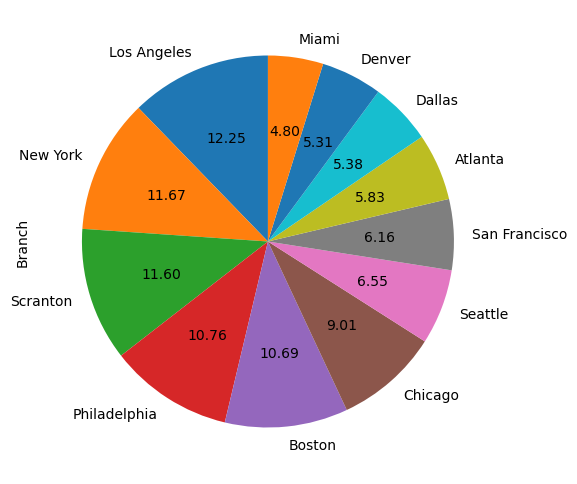

In [13]:
plt.figure(figsize=(6, 7))
df['Branch'].value_counts().plot(kind="pie", autopct="%.2f", startangle=90)
plt.show()

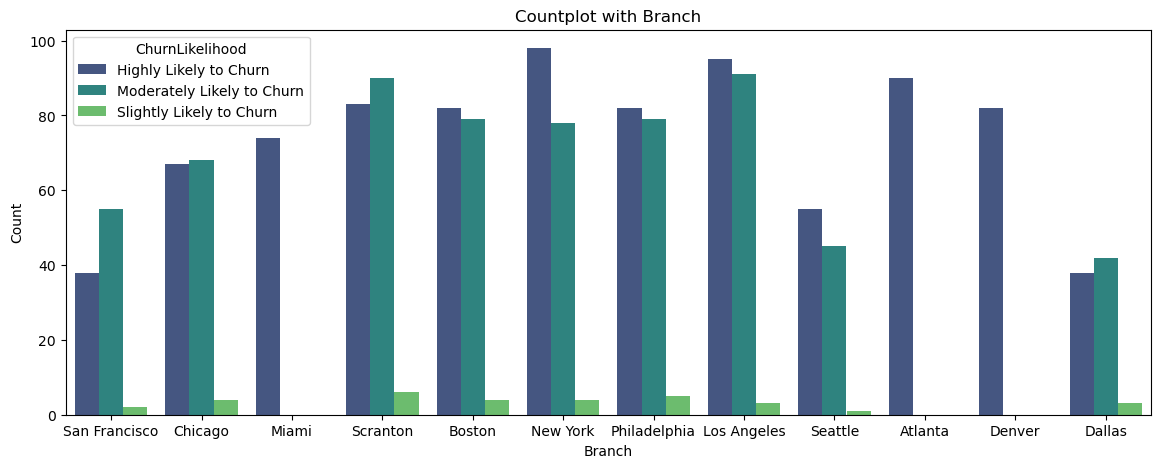

In [14]:
plt.figure(figsize=(14, 5))

sns.countplot(data=df, x='Branch', hue='ChurnLikelihood', palette='viridis')

plt.title('Countplot with Branch')
plt.xlabel('Branch')
plt.ylabel('Count')

plt.show()

# As we can see the Branch column has the highest employee churn or attrition and has very highly Likely to leave the company. 

<Axes: xlabel='Tenure', ylabel='Count'>

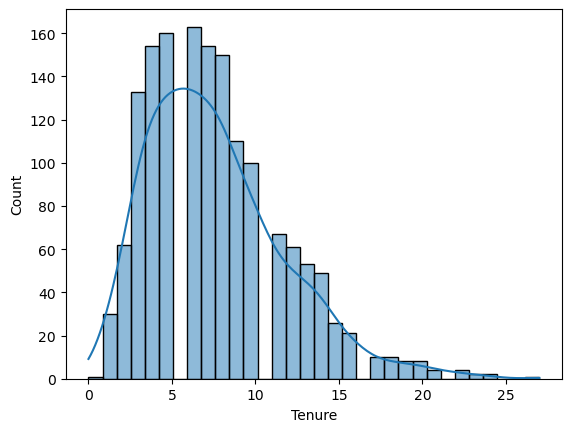

In [15]:
sns.histplot(data = df["Tenure"], kde = True)

Text(0.5, 1.0, 'ChurnLikelihood Distribution')

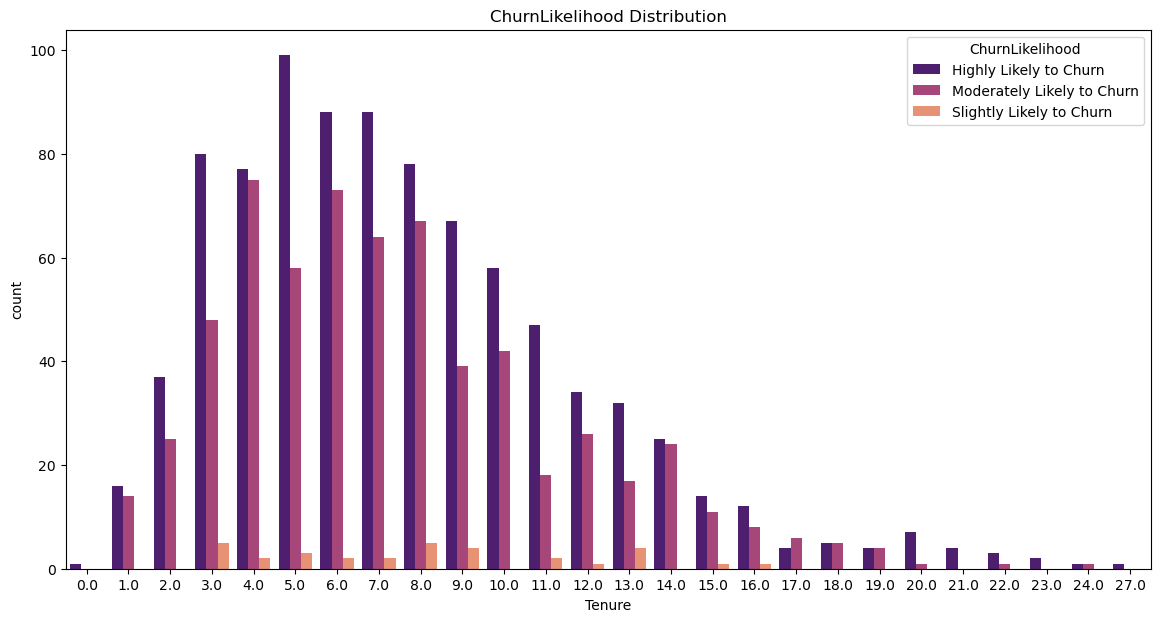

In [16]:
plt.figure(figsize=(14, 7))
sns.countplot(data=df, x='Tenure', hue='ChurnLikelihood', palette='magma')
plt.title('ChurnLikelihood Distribution')

# Tenure column states that "The number of years the employee has been with the company". 
So here we can see high rise between 2 to 11 in Tenure and the column has rightly skewed data.</li>
<li>There is a high growth starting from Tenure 1 and goes high to 5 where the employee is highly likely to leave the company and falls down as according.</li>
<li>Also as we can see there is constant high rise in the class which states highly likely to leave the company. </li>
<li>And in the years of 14, 18 & 19 there is equal class distribution.

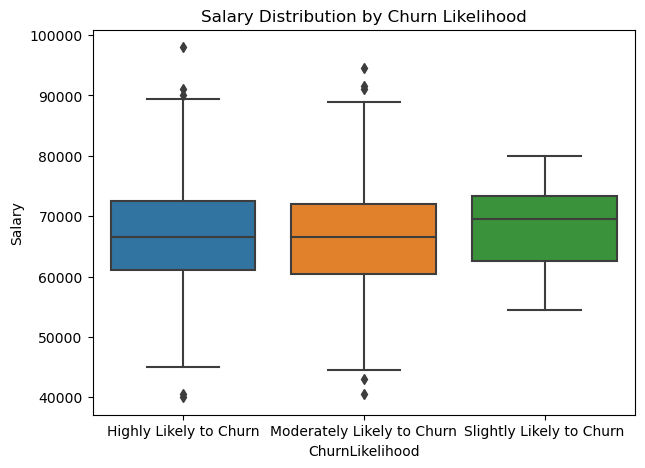

In [17]:
plt.figure(figsize=(7, 5))
sns.boxplot(x='ChurnLikelihood', y='Salary', data=df)
plt.title('Salary Distribution by Churn Likelihood')
plt.show()

Text(0.5, 1.0, 'Salary Distribution by Churn Likelihood')

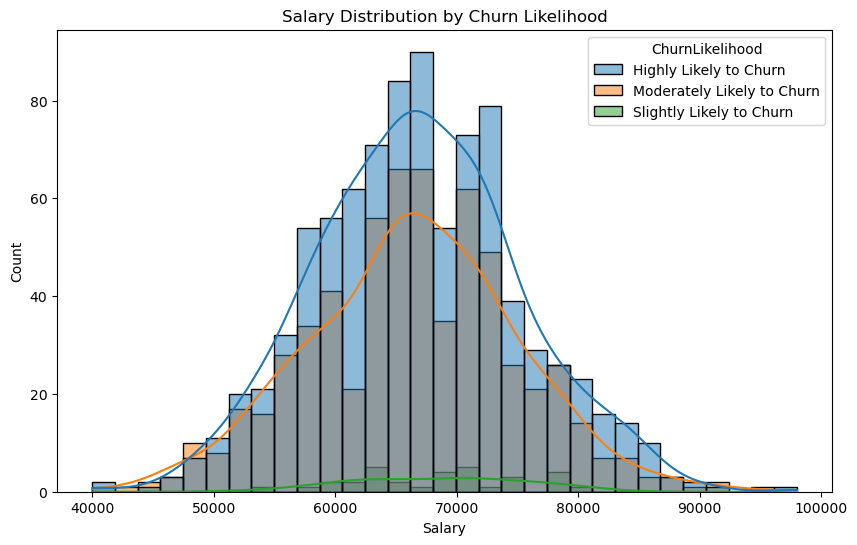

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Salary', hue='ChurnLikelihood', kde=True)
plt.title('Salary Distribution by Churn Likelihood')

# Mostly salaries between 60k to 75k tends to have high employee attrition. 

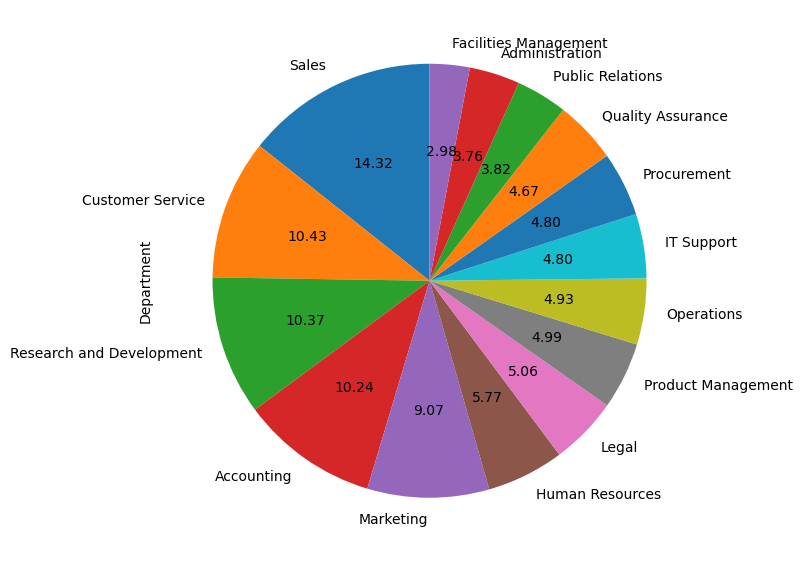

In [19]:
plt.figure(figsize=(7, 12))
df['Department'].value_counts().plot(kind="pie", autopct="%.2f", startangle=90)
plt.show()

<Axes: xlabel='Department', ylabel='Count'>

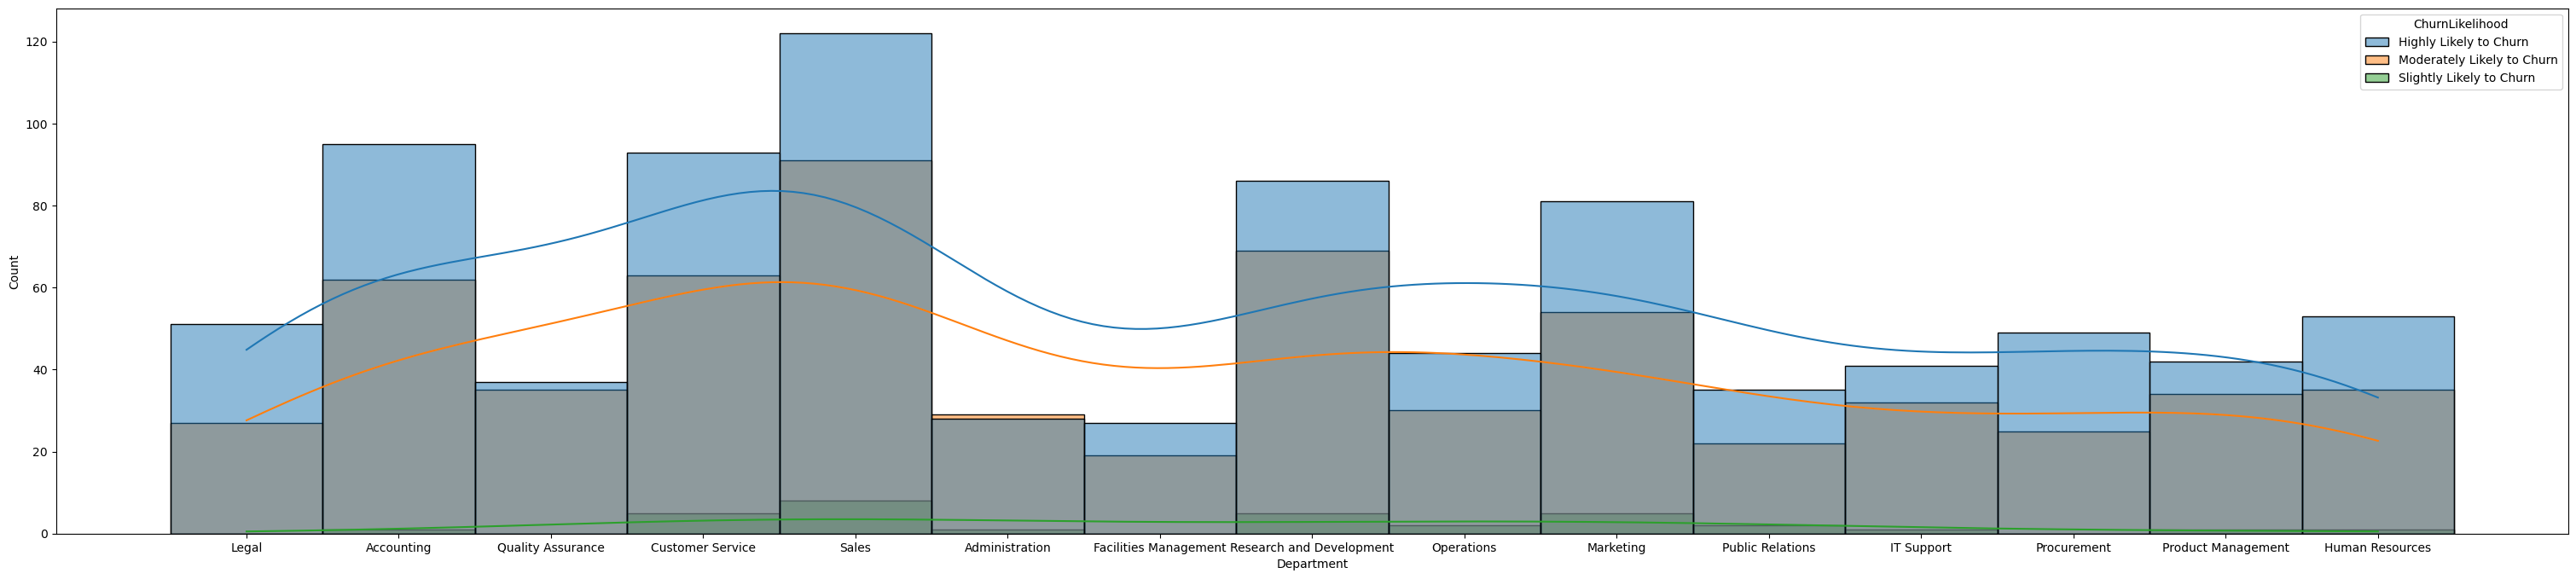

In [20]:
plt.figure(figsize=(38,8))
sns.histplot(data=df, x='Department', hue='ChurnLikelihood', kde=True)

Text(0.5, 1.0, 'ChurnLikelihood Distribution')

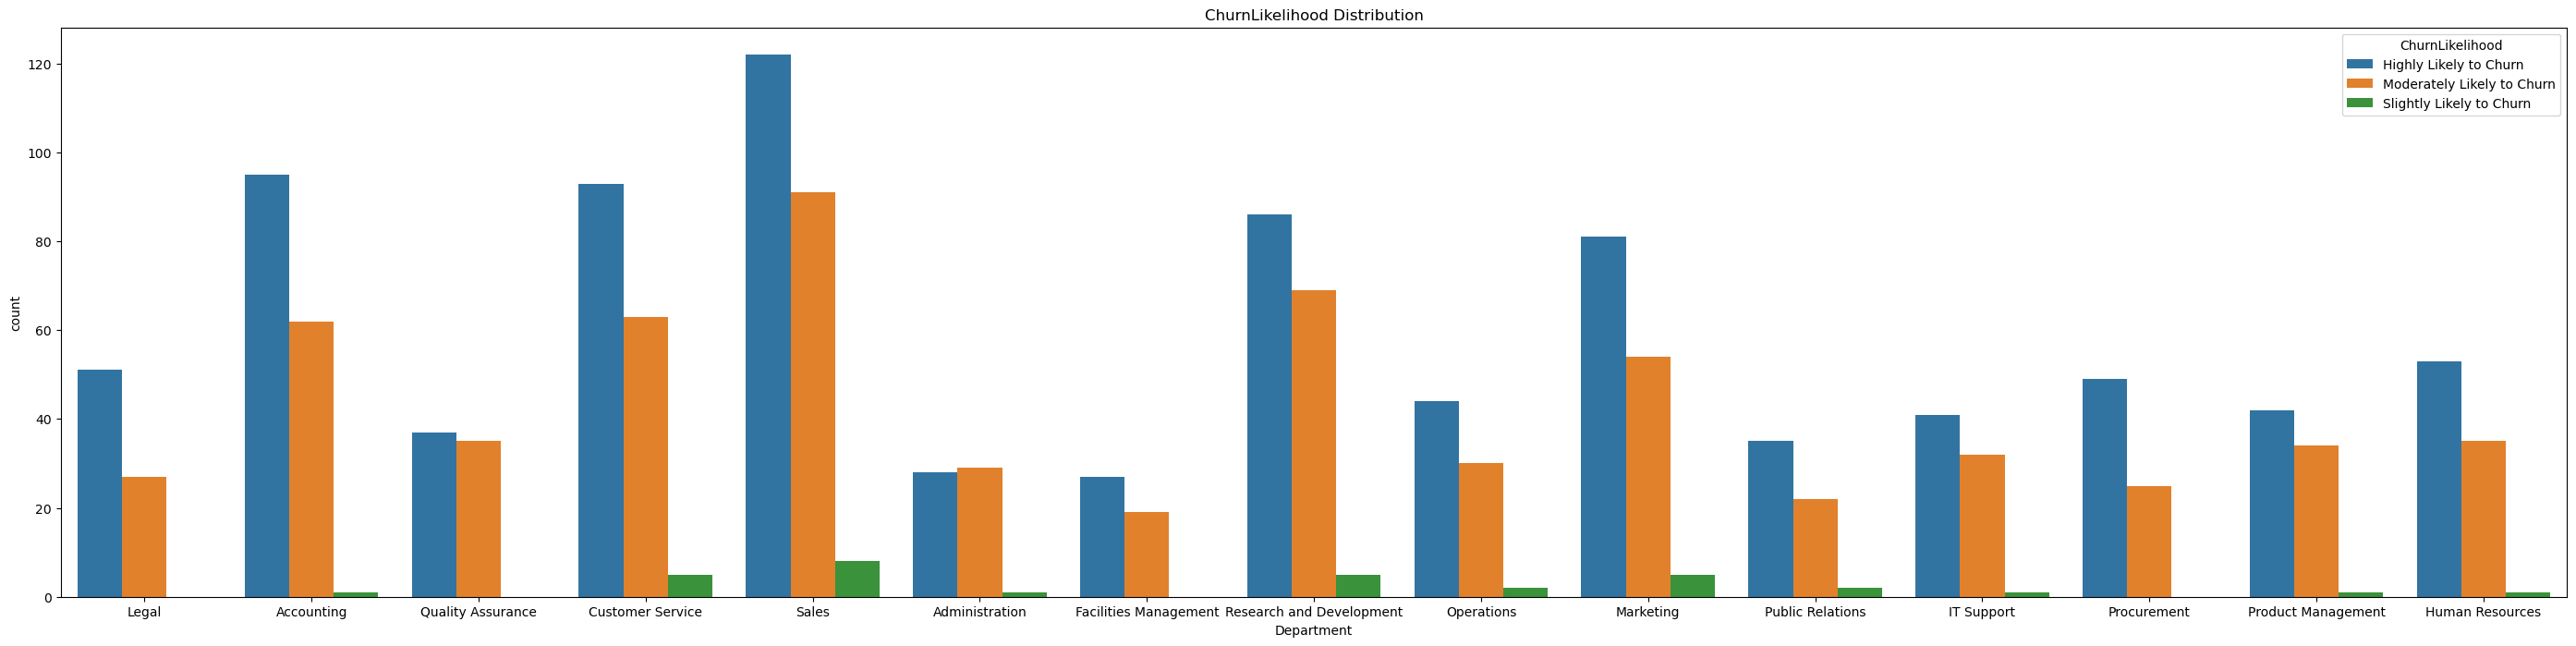

In [21]:
plt.figure(figsize=(35, 8))
sns.countplot(data=df, x='Department', hue='ChurnLikelihood')
plt.title('ChurnLikelihood Distribution')

Text(0, 0.5, 'Count')

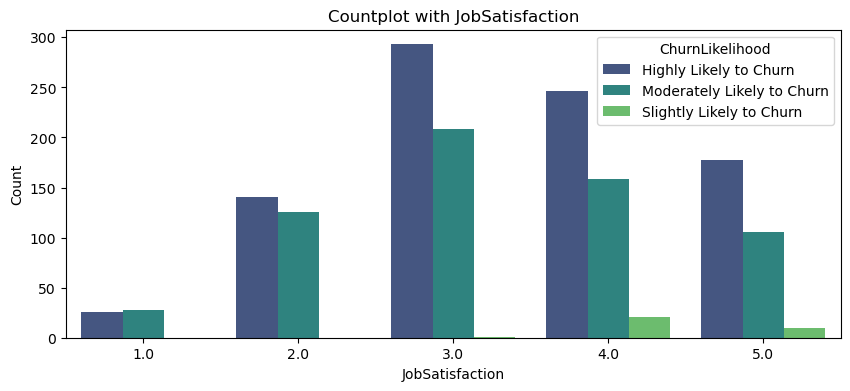

In [22]:
plt.figure(figsize=(10, 4))

sns.countplot(data=df, x='JobSatisfaction', hue='ChurnLikelihood', palette='viridis')

plt.title('Countplot with JobSatisfaction')
plt.xlabel('JobSatisfaction')
plt.ylabel('Count')

Text(0.5, 1.0, 'WorkLifeBalance Distribution by Churn Likelihood')

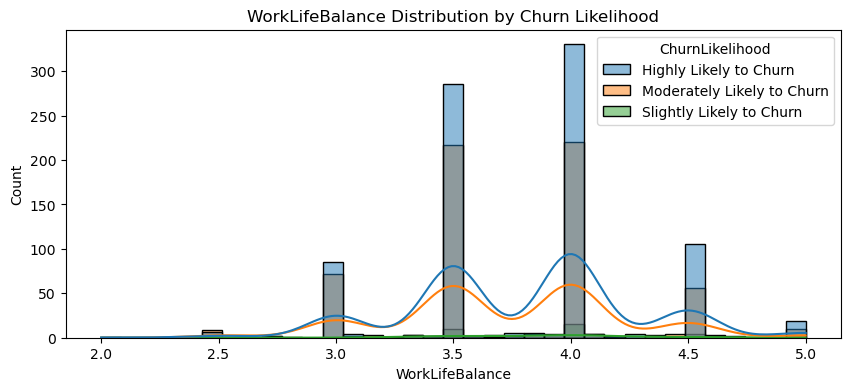

In [23]:
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x='WorkLifeBalance', hue='ChurnLikelihood', kde=True)
plt.title('WorkLifeBalance Distribution by Churn Likelihood')

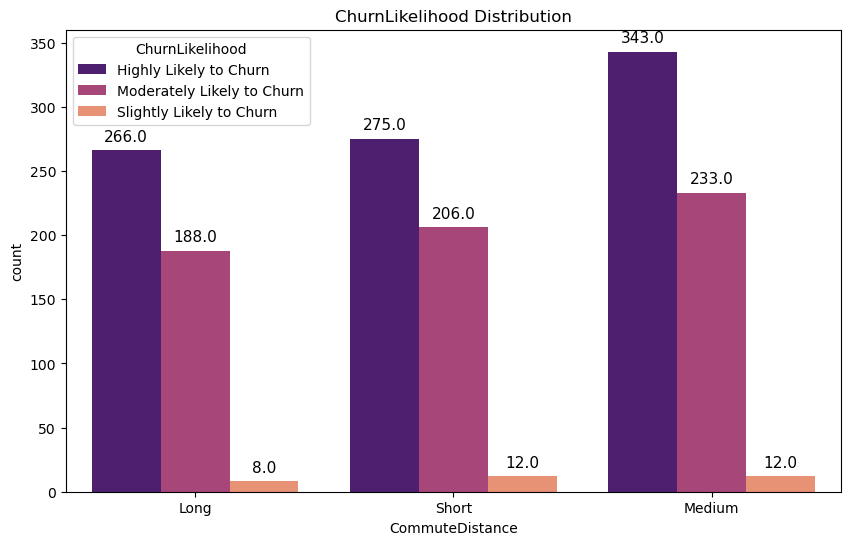

In [24]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='CommuteDistance', hue='ChurnLikelihood', palette='magma')
plt.title('ChurnLikelihood Distribution')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 10),
                textcoords='offset points')

<Axes: xlabel='CommuteDistance', ylabel='Count'>

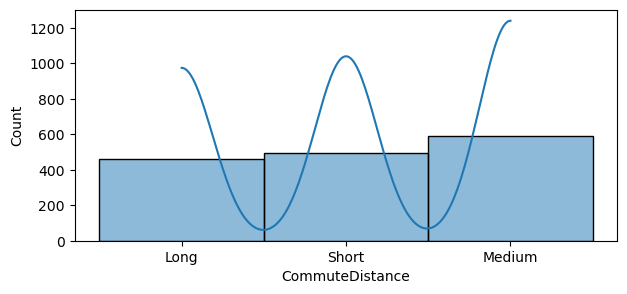

In [25]:
plt.figure(figsize=(7, 3))
sns.histplot(data=df['CommuteDistance'], kde=True)

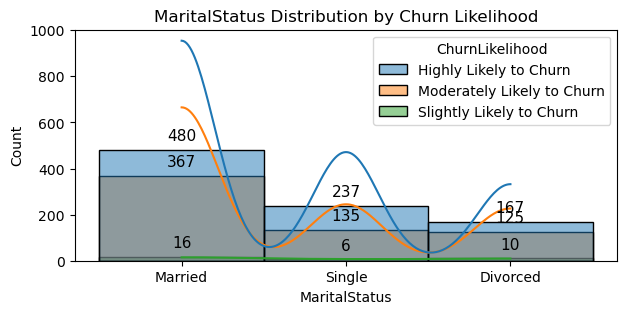

In [26]:
plt.figure(figsize=(7, 3))
ax = sns.histplot(data=df, x='MaritalStatus', hue='ChurnLikelihood', kde=True)
plt.title('MaritalStatus Distribution by Churn Likelihood')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 10),
                textcoords='offset points')

Text(0.5, 1.0, 'ChurnLikelihood Distribution')

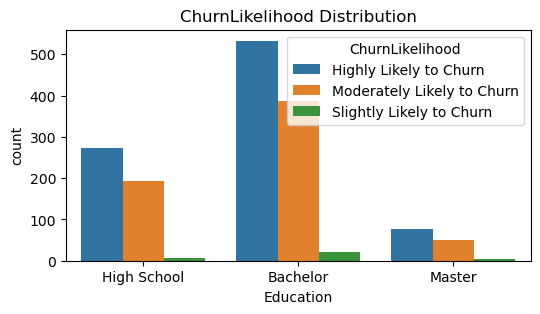

In [27]:
plt.figure(figsize=(6, 3))
sns.countplot(data=df, x='Education', hue='ChurnLikelihood')
plt.title('ChurnLikelihood Distribution')

# As we can see Bachelor's Education has high employee churn. 

<Axes: xlabel='PerformanceRating', ylabel='Count'>

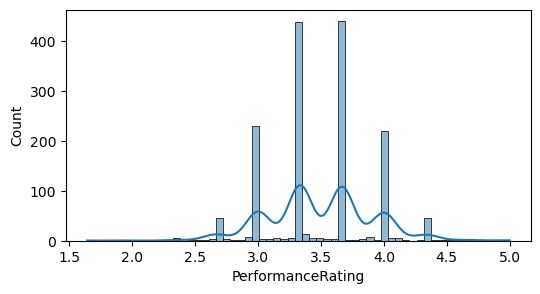

In [28]:
plt.figure(figsize=(6, 3))
sns.histplot(df['PerformanceRating'], kde=True)

Text(0.5, 1.0, 'TrainingHours Distribution by Churn Likelihood')

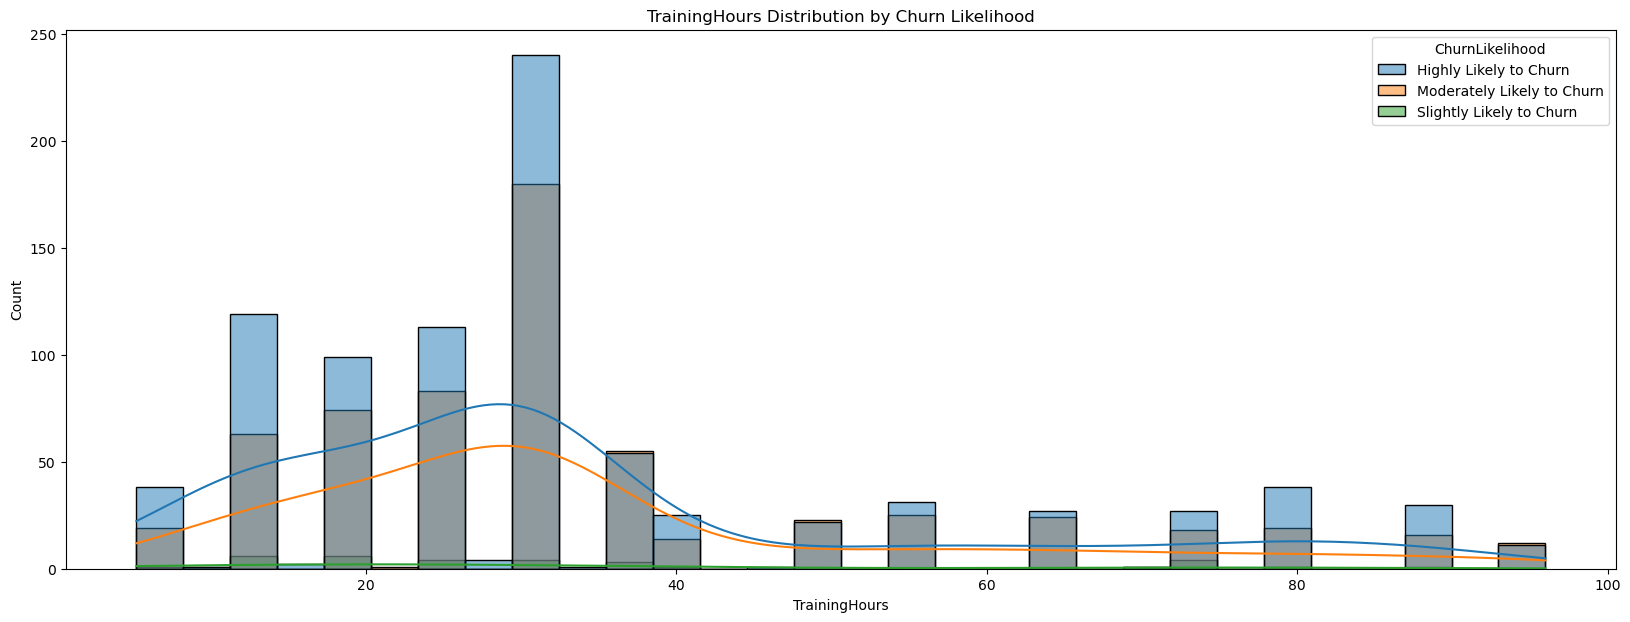

In [29]:
plt.figure(figsize=(20, 7))
sns.histplot(data=df, x='TrainingHours', hue='ChurnLikelihood', kde=True)
plt.title('TrainingHours Distribution by Churn Likelihood')

<Axes: ylabel='OverTime'>

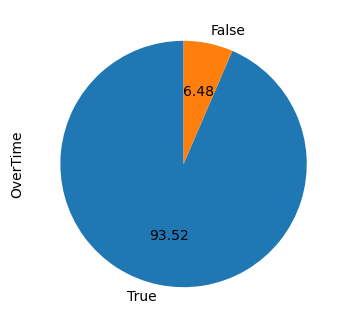

In [30]:
plt.figure(figsize=(4, 4))
df['OverTime'].value_counts().plot(kind="pie", autopct="%.2f", startangle=90)

In [31]:
df['NumProjects'] = df['NumProjects'].astype(int)

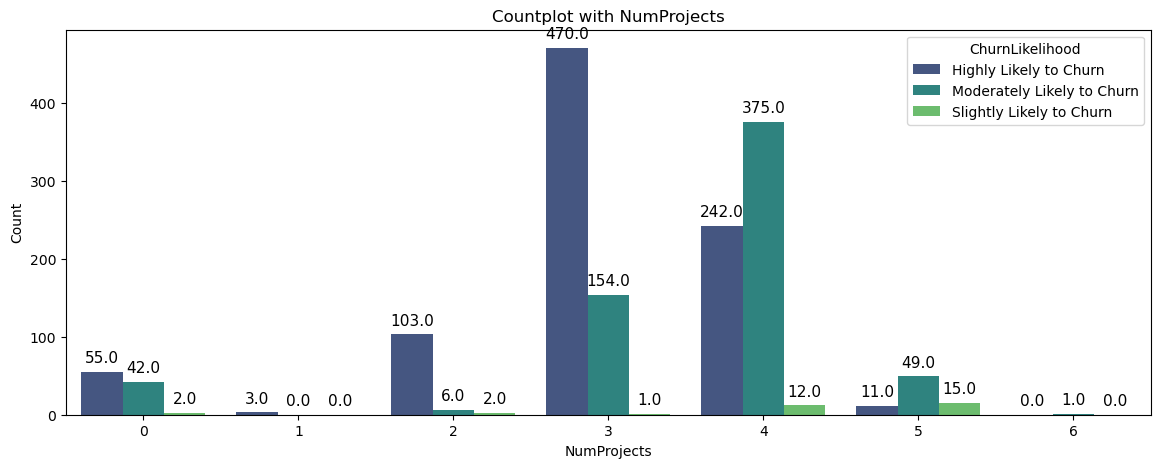

In [32]:
plt.figure(figsize=(14, 5))

ax = sns.countplot(data=df, x='NumProjects', hue='ChurnLikelihood', palette='viridis')

plt.title('Countplot with NumProjects')
plt.xlabel('NumProjects')
plt.ylabel('Count')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 10),
                textcoords='offset points')

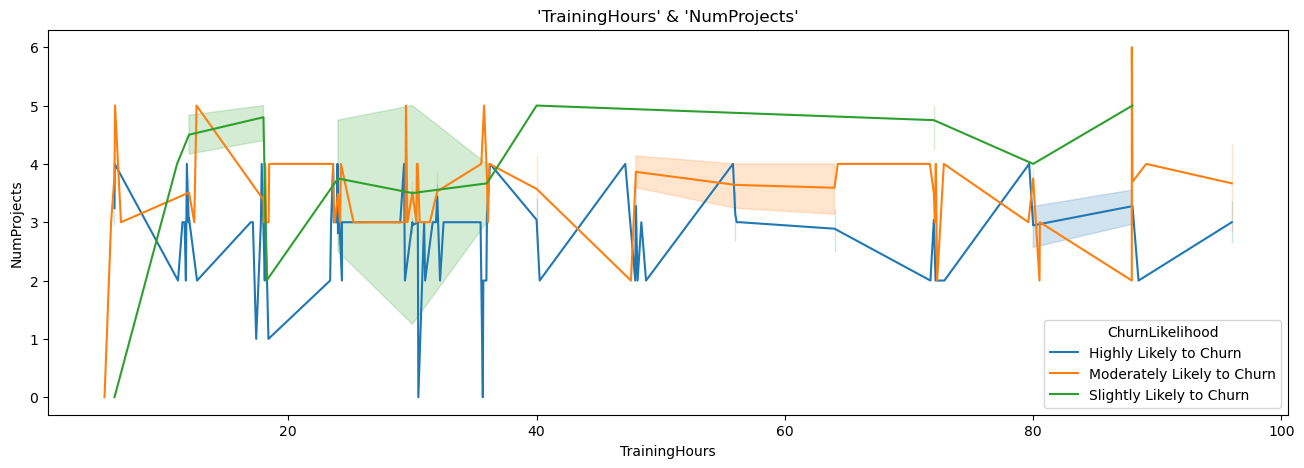

In [33]:
plt.figure(figsize = (16,5))
sns.lineplot(data = df, x = 'TrainingHours', y = 'NumProjects', hue = 'ChurnLikelihood')
plt.title("'TrainingHours' & 'NumProjects'");

Text(0.5, 1.0, "'TrainingHours' & 'NumProjects'")

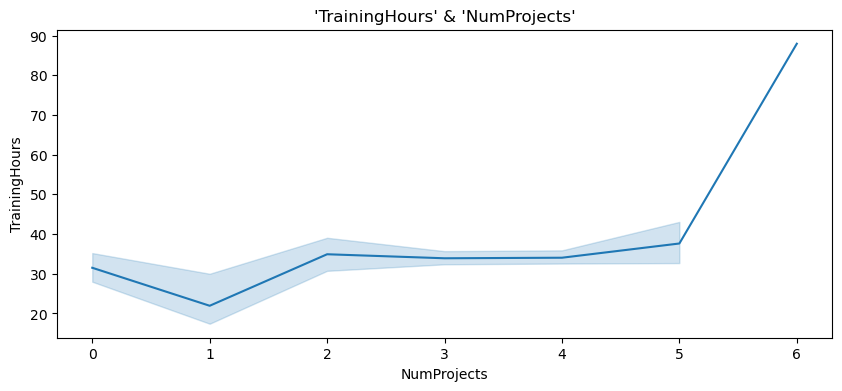

In [34]:
plt.figure(figsize = (10,4))
sns.lineplot(data = df, y = 'TrainingHours', x = 'NumProjects')
plt.title("'TrainingHours' & 'NumProjects'")

Text(0.5, 1.0, 'YearsSincePromotion Distribution by Churn Likelihood')

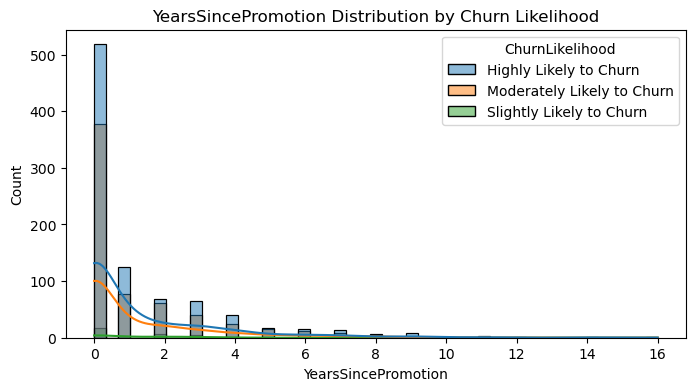

In [35]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='YearsSincePromotion', hue='ChurnLikelihood', kde=True)
plt.title('YearsSincePromotion Distribution by Churn Likelihood')

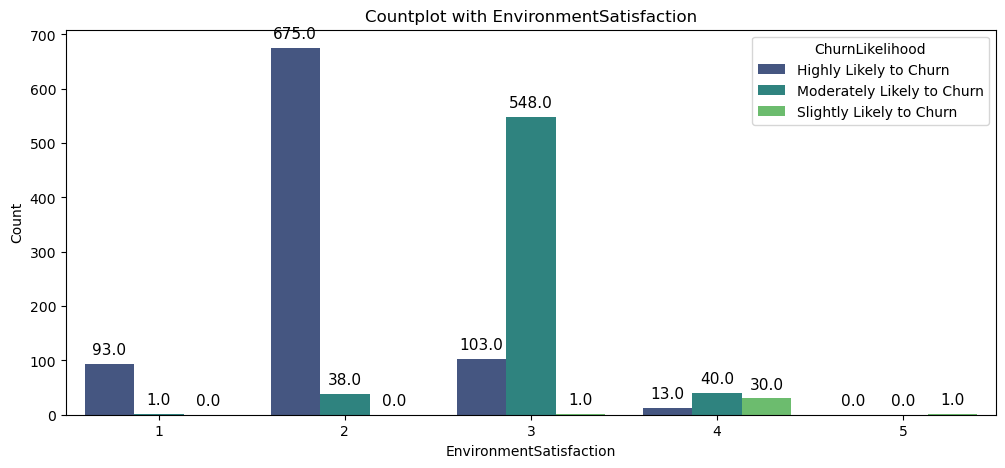

In [36]:
df['EnvironmentSatisfaction'] = df['EnvironmentSatisfaction'].astype(int)

plt.figure(figsize=(12, 5))

ax = sns.countplot(data=df, x='EnvironmentSatisfaction', hue='ChurnLikelihood', palette='viridis')

plt.title('Countplot with EnvironmentSatisfaction')
plt.xlabel('EnvironmentSatisfaction')
plt.ylabel('Count')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 10),
                textcoords='offset points')

In [37]:
import plotly.express as px
px.histogram(df, x = 'NumProjects', color = 'OverTime', title = "'NumProjects' & 'OverTime'")

<Axes: ylabel='ChurnLikelihood'>

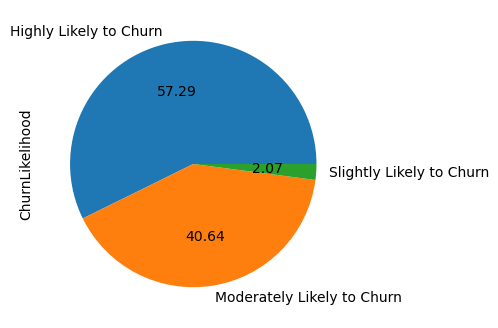

In [38]:
plt.figure(figsize=(4, 4))
df['ChurnLikelihood'].value_counts().plot(kind="pie", autopct="%.2f")

# Now I will try to convert categorical columns into numeric in this i will use Label encoding.

In [39]:
df["OverTime"] = df["OverTime"].replace({True: 1, False: 0})

In [40]:
df['Salary'] = df['Salary'].astype(int)

In [41]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['Branch', 'Department', 'CommuteDistance', 'MaritalStatus', 'Education', 'ChurnLikelihood']

label_encoder = LabelEncoder()

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [43]:
df['Tenure'] = df['Tenure'].astype(int)
df['JobSatisfaction'] = df['JobSatisfaction'].astype(int)
df['WorkLifeBalance'] = df['WorkLifeBalance'].astype(int)
df['PerformanceRating'] = df['PerformanceRating'].astype(int)
df['TrainingHours'] = df['TrainingHours'].astype(int)
df['YearsSincePromotion'] = df['YearsSincePromotion'].astype(int)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1543 entries, 0 to 1542
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Branch                   1543 non-null   int32
 1   Tenure                   1543 non-null   int32
 2   Salary                   1543 non-null   int32
 3   Department               1543 non-null   int32
 4   JobSatisfaction          1543 non-null   int32
 5   WorkLifeBalance          1543 non-null   int32
 6   CommuteDistance          1543 non-null   int32
 7   MaritalStatus            1543 non-null   int32
 8   Education                1543 non-null   int32
 9   PerformanceRating        1543 non-null   int32
 10  TrainingHours            1543 non-null   int32
 11  OverTime                 1543 non-null   int64
 12  NumProjects              1543 non-null   int32
 13  YearsSincePromotion      1543 non-null   int32
 14  EnvironmentSatisfaction  1543 non-null   int32
 15  Chur

In [45]:
df.head()

Branch  Tenure  Salary  Department  JobSatisfaction  WorkLifeBalance  \
0       9       4   63000           6                3                3   
1       2      14   72000           0                4                4   
2       6       4   40000          12                3                3   
3      10       2   55000           6                3                3   
4      10      10   55500           6                3                3   

   CommuteDistance  MaritalStatus  Education  PerformanceRating  \
0                0              1          1                  3   
1                2              2          0                  3   
2                1              2          1                  3   
3                2              1          0                  3   
4                1              1          0                  3   

   TrainingHours  OverTime  NumProjects  YearsSincePromotion  \
0             88         1            3                    0   
1             30         1            3                    2   
2             64         0            0                    0   
3             30         1            4                    0   
4             18         0            4                    1   

   EnvironmentSatisfaction  ChurnLikelihood  
0                        2                0  
1                        3                1  
2                        4                0  
3                        3                1  
4                        3                1

# Heatmap correlation

Text(0.5, 1.0, 'Correlation Heatmap')

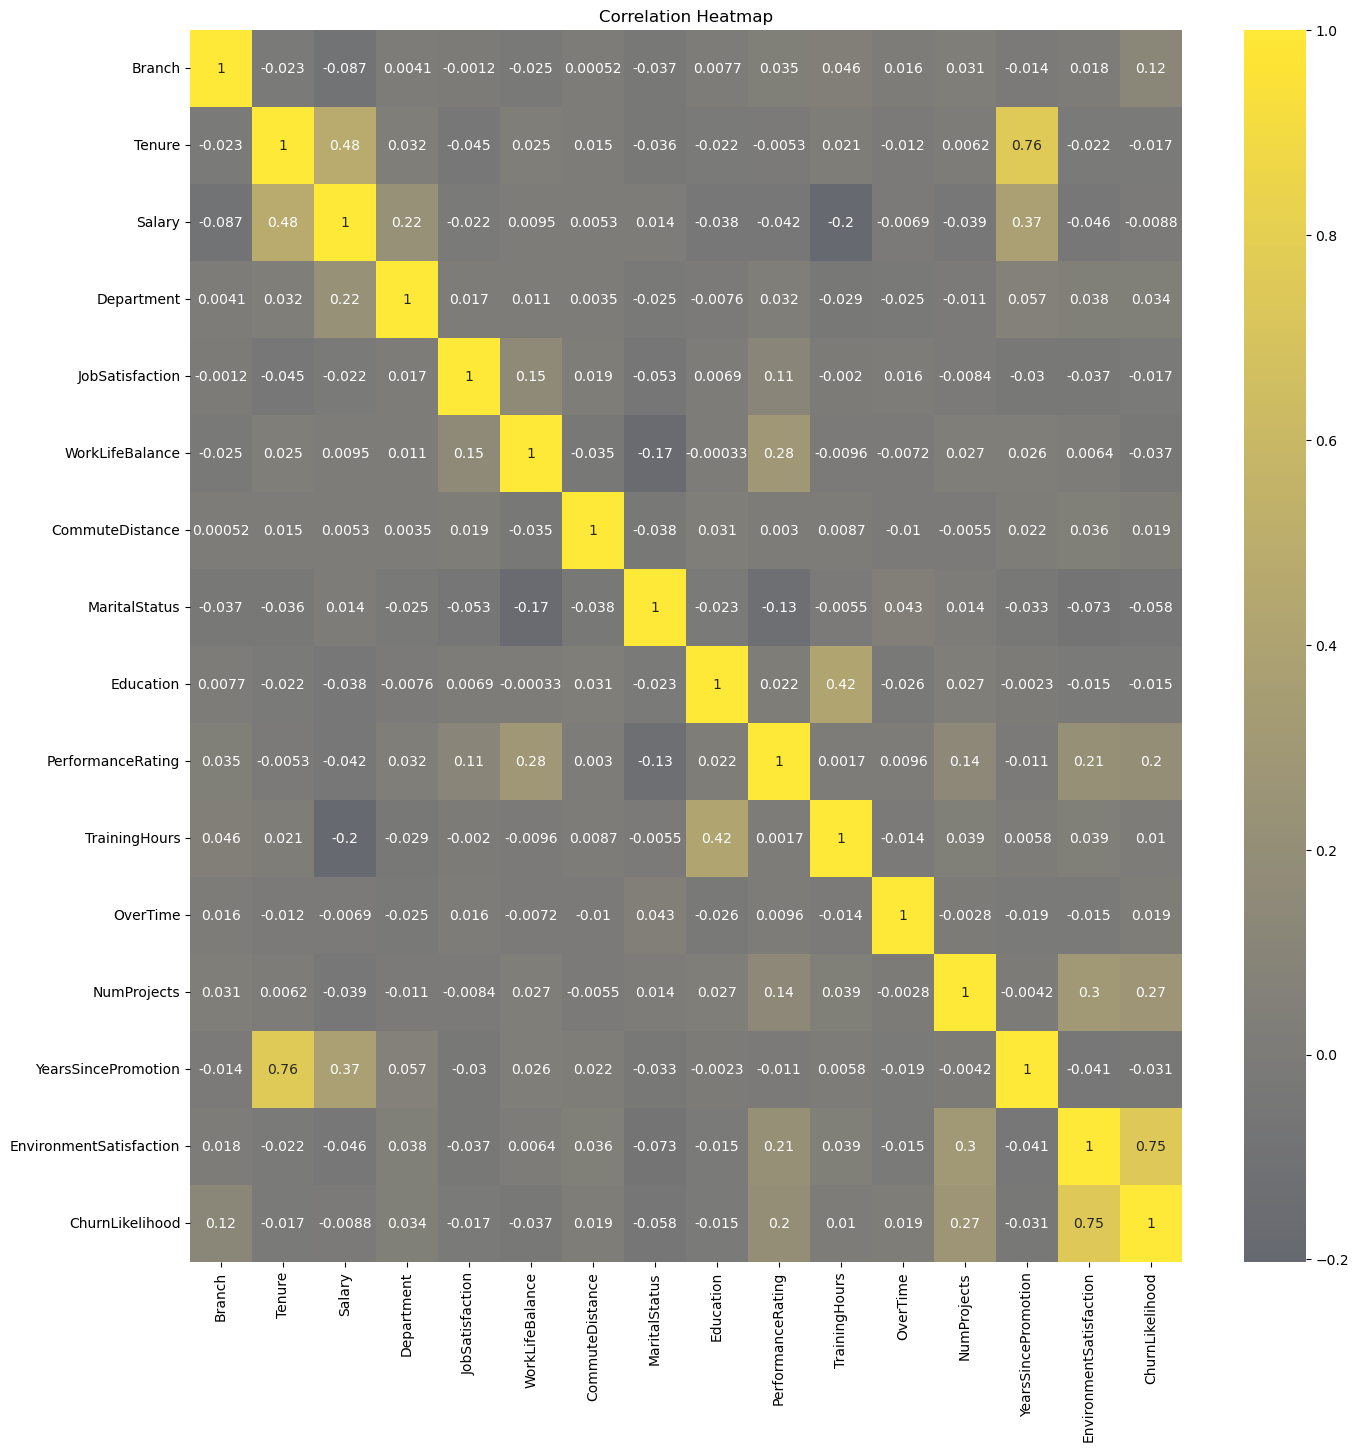

In [46]:
correlation_matrix = df.corr()

plt.figure(figsize=(16, 16))
sns.heatmap(correlation_matrix, annot=True, cmap="cividis", center=0)
plt.title("Correlation Heatmap")

# Handling Outliers 

In [47]:
df.describe()

Branch       Tenure        Salary   Department  JobSatisfaction  \
count  1543.000000  1543.000000   1543.000000  1543.000000      1543.000000   
mean      5.672715     7.608555  66653.596889     7.403111         3.414128   
std       3.395247     4.112047   8448.865707     4.825977         1.086520   
min       0.000000     0.000000  40000.000000     0.000000         1.000000   
25%       2.000000     5.000000  61000.000000     3.000000         3.000000   
50%       6.000000     7.000000  66500.000000     7.000000         3.000000   
75%       8.000000    10.000000  72000.000000    12.000000         4.000000   
max      11.000000    27.000000  98000.000000    14.000000         5.000000   

       WorkLifeBalance  CommuteDistance  MaritalStatus    Education  \
count      1543.000000      1543.000000    1543.000000  1543.000000   
mean          3.514582         1.020091       1.049255     0.475049   
std           0.566820         0.786716       0.662237     0.646646   
min           2.000000         0.000000       0.000000     0.000000   
25%           3.000000         0.000000       1.000000     0.000000   
50%           4.000000         1.000000       1.000000     0.000000   
75%           4.000000         2.000000       1.000000     1.000000   
max           5.000000         2.000000       2.000000     2.000000   

       PerformanceRating  TrainingHours     OverTime  NumProjects  \
count        1543.000000    1543.000000  1543.000000  1543.000000   
mean            3.137395      34.035645     0.935191     3.238496   
std             0.478373      21.553286     0.246268     1.099532   
min             1.000000       5.000000     0.000000     0.000000   
25%             3.000000      18.000000     1.000000     3.000000   
50%             3.000000      30.000000     1.000000     3.000000   
75%             3.000000      36.000000     1.000000     4.000000   
max             5.000000      96.000000     1.000000     6.000000   

       YearsSincePromotion  EnvironmentSatisfaction  ChurnLikelihood  
count          1543.000000              1543.000000      1543.000000  
mean              1.202852                 2.471160         0.447829  
std               2.059036                 0.694833         0.537534  
min               0.000000                 1.000000         0.000000  
25%               0.000000                 2.000000         0.000000  
50%               0.000000                 2.000000         0.000000  
75%               2.000000                 3.000000         1.000000  
max              16.000000                 5.000000         2.000000

Text(0.5, 1.0, 'Boxplot for Each Column')

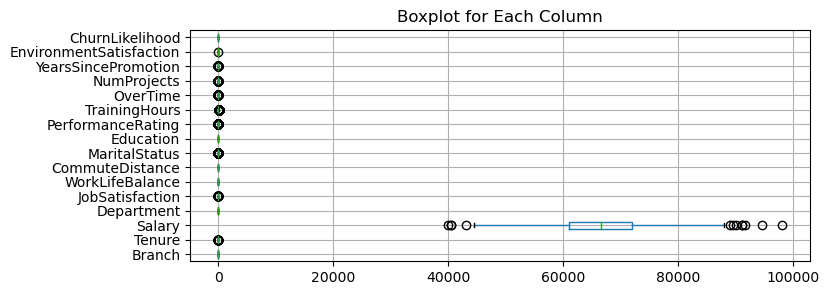

In [48]:
plt.figure(figsize=(8, 3)) 
df.boxplot(vert=False) 
plt.title('Boxplot for Each Column')

# It seems like there is outlier in Salary column lets try to check in boxplot and also by using Interquartile Range

Text(0.5, 1.0, 'Boxplots of Columns')

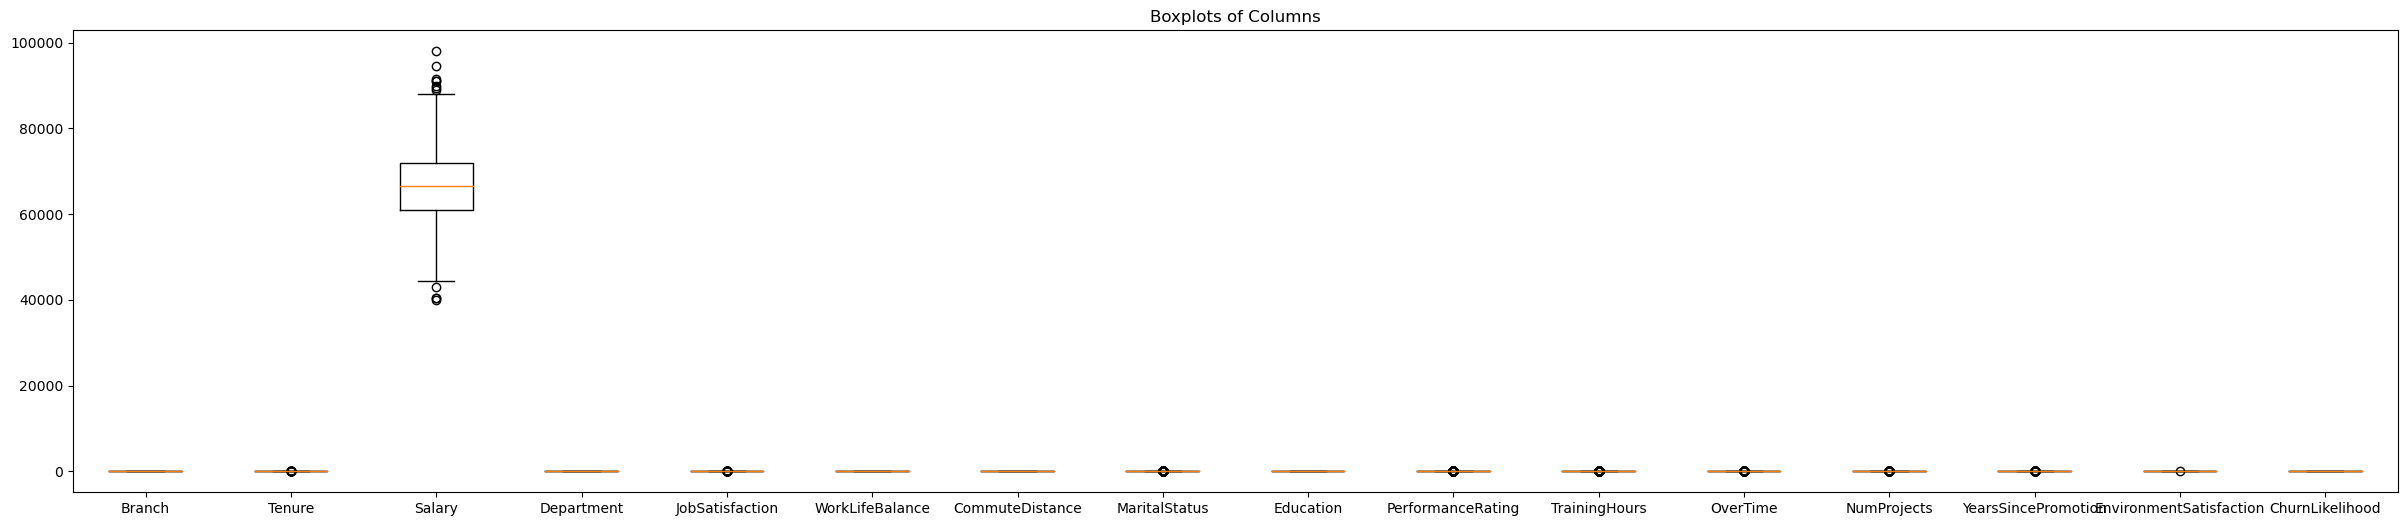

In [49]:
plt.figure(figsize=(30, 6)) 
plt.boxplot(df.values, labels=df.columns)

plt.title('Boxplots of Columns')

In [50]:
Q1 = df["Salary"].quantile(0.25)
Q3 = df["Salary"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df["Salary"] > upper_bound)]
print(upper_bound)

df = df[(df["Salary"] <= upper_bound)]

88500.0


In [51]:
df.describe()

Branch       Tenure       Salary   Department  JobSatisfaction  \
count  1535.000000  1535.000000   1535.00000  1535.000000      1535.000000   
mean      5.674919     7.555700  66522.47557     7.398046         3.416287   
std       3.394027     4.042392   8270.18784     4.818870         1.087140   
min       0.000000     0.000000  40000.00000     0.000000         1.000000   
25%       2.000000     5.000000  61000.00000     3.000000         3.000000   
50%       6.000000     7.000000  66500.00000     7.000000         3.000000   
75%       8.000000    10.000000  72000.00000    12.000000         4.000000   
max      11.000000    24.000000  88000.00000    14.000000         5.000000   

       WorkLifeBalance  CommuteDistance  MaritalStatus    Education  \
count      1535.000000      1535.000000    1535.000000  1535.000000   
mean          3.514658         1.018241       1.050814     0.472313   
std           0.567147         0.786742       0.661887     0.643174   
min           2.000000         0.000000       0.000000     0.000000   
25%           3.000000         0.000000       1.000000     0.000000   
50%           4.000000         1.000000       1.000000     0.000000   
75%           4.000000         2.000000       1.000000     1.000000   
max           5.000000         2.000000       2.000000     2.000000   

       PerformanceRating  TrainingHours     OverTime  NumProjects  \
count        1535.000000    1535.000000  1535.000000  1535.000000   
mean            3.136808      34.088599     0.936156     3.235831   
std             0.478529      21.588180     0.244554     1.100737   
min             1.000000       5.000000     0.000000     0.000000   
25%             3.000000      18.000000     1.000000     3.000000   
50%             3.000000      30.000000     1.000000     3.000000   
75%             3.000000      36.000000     1.000000     4.000000   
max             5.000000      96.000000     1.000000     6.000000   

       YearsSincePromotion  EnvironmentSatisfaction  ChurnLikelihood  
count          1535.000000              1535.000000      1535.000000  
mean              1.168078                 2.471010         0.447557  
std               1.995535                 0.694765         0.537710  
min               0.000000                 1.000000         0.000000  
25%               0.000000                 2.000000         0.000000  
50%               0.000000                 2.000000         0.000000  
75%               2.000000                 3.000000         1.000000  
max              16.000000                 5.000000         2.000000

Text(0.5, 1.0, 'Boxplot for Each Column')

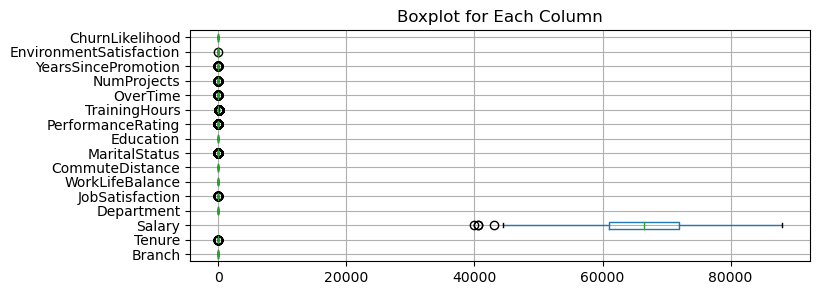

In [52]:
plt.figure(figsize=(8, 3)) 
df.boxplot(vert=False) 
plt.title('Boxplot for Each Column')

# To some extend our outliers have been removed which I think is good to go to split into train test. 

In [53]:
df.columns

Index(['Branch', 'Tenure', 'Salary', 'Department', 'JobSatisfaction',
       'WorkLifeBalance', 'CommuteDistance', 'MaritalStatus', 'Education',
       'PerformanceRating', 'TrainingHours', 'OverTime', 'NumProjects',
       'YearsSincePromotion', 'EnvironmentSatisfaction', 'ChurnLikelihood'],
      dtype='object')

In [54]:
print('Data: \nRows: {} Columns: {}'.format(df.shape[0], df.shape[1]))

Data: 
Rows: 1535 Columns: 16


# Train Test Split

In [55]:
X = df.drop(['ChurnLikelihood'], axis=1)
y = df['ChurnLikelihood']

In [56]:
from collections import Counter
counter = Counter(y)
print(counter)

Counter({0: 880, 1: 623, 2: 32})


In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [58]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# LOGISTIC REGRESSION

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.8763557483731019
              precision    recall  f1-score   support

           0       0.94      0.86      0.90       264
           1       0.81      0.91      0.86       187
           2       0.78      0.70      0.74        10

    accuracy                           0.88       461
   macro avg       0.84      0.82      0.83       461
weighted avg       0.88      0.88      0.88       461



# KNeighborsClassifier

In [60]:
from sklearn.neighbors import KNeighborsClassifier
k=5
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(classification_report(y_test, y_pred))

Accuracy: 0.7852494577006508
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       264
           1       0.76      0.70      0.73       187
           2       1.00      0.20      0.33        10

    accuracy                           0.79       461
   macro avg       0.85      0.59      0.63       461
weighted avg       0.79      0.79      0.78       461



# Hyperparameter Tuning

# DecisionTreeClassifier

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

dt_classifier = DecisionTreeClassifier()

param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

best_dt_model = grid_search.best_estimator_
y_pred = best_dt_model.predict(X_test)

train_accuracy = best_dt_model.score(X_train, y_train)
print("Training Set Accuracy:", train_accuracy)

test_accuracy = best_dt_model.score(X_test, y_test)
print("Testing Set Accuracy:", test_accuracy)

print(classification_report(y_test, y_pred))

Best Hyperparameters: {'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 5}
Training Set Accuracy: 0.9617263843648208
Testing Set Accuracy: 0.9609120521172638
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       171
           1       0.98      0.94      0.96       126
           2       1.00      0.90      0.95        10

    accuracy                           0.96       307
   macro avg       0.97      0.94      0.96       307
weighted avg       0.96      0.96      0.96       307



# RandomForestClassifier with GridSearchCV
Using different possible Hyperparameters

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

rf_classifier = RandomForestClassifier(random_state=42)

In [63]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [64]:
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [65]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [66]:
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

best_model = grid_search.best_estimator_
train_accuracy = best_model.score(X_train, y_train)
print("Training Set Accuracy:", train_accuracy)

test_accuracy = best_model.score(X_test, y_test)
print("Testing Set Accuracy:", test_accuracy)

print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy}')

Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Best Accuracy: 0.9047220839555334
Training Set Accuracy: 0.9820846905537459
Testing Set Accuracy: 0.9120521172638436
              precision    recall  f1-score   support

           0       0.97      0.92      0.95       171
           1       0.85      0.96      0.90       126
           2       1.00      0.10      0.18        10

    accuracy                           0.91       307
   macro avg       0.94      0.66      0.68       307
weighted avg       0.92      0.91      0.90       307

Accuracy: 0.9120521172638436


In [67]:
model = RandomForestClassifier()  

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [68]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [69]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [70]:
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Best Model Accuracy: {accuracy}')

Best Model Accuracy: 0.9218241042345277


In [71]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)
#tp fp
#fn tn

array([[160,  11,   0],
       [  5, 121,   0],
       [  0,   8,   2]], dtype=int64)

# XGBoost (Extreme Gradient Boosting) with GridSearchCV
Using possible Hyperparameters

In [72]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

xgb_classifier = XGBClassifier(random_state=42)

param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 400],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3],
}

In [73]:
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [74]:
y_pred = best_model.predict(X_test)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

best_model = grid_search.best_estimator_
train_accuracy = best_model.score(X_train, y_train)
print("Training Set Accuracy:", train_accuracy)

test_accuracy = best_model.score(X_test, y_test)
print("Testing Set Accuracy:", test_accuracy)

print(classification_report(y_test, y_pred))

Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 2, 'n_estimators': 200}
Best Accuracy: 0.9601028704164593
Accuracy: 0.9739413680781759
Training Set Accuracy: 0.9666123778501629
Testing Set Accuracy: 0.9739413680781759
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       171
           1       0.98      0.96      0.97       126
           2       1.00      0.90      0.95        10

    accuracy                           0.97       307
   macro avg       0.98      0.95      0.97       307
weighted avg       0.97      0.97      0.97       307



In [75]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)
#tp fp
#fn tn

array([[169,   2,   0],
       [  5, 121,   0],
       [  0,   1,   9]], dtype=int64)

In [76]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [77]:
print(model.feature_importances_)

[0.18749028 0.01306537 0.01628703 0.01323523 0.03301381 0.01221947
 0.00755323 0.01027972 0.00667558 0.02125208 0.01516814 0.00469698
 0.06337092 0.0080201  0.58767205]


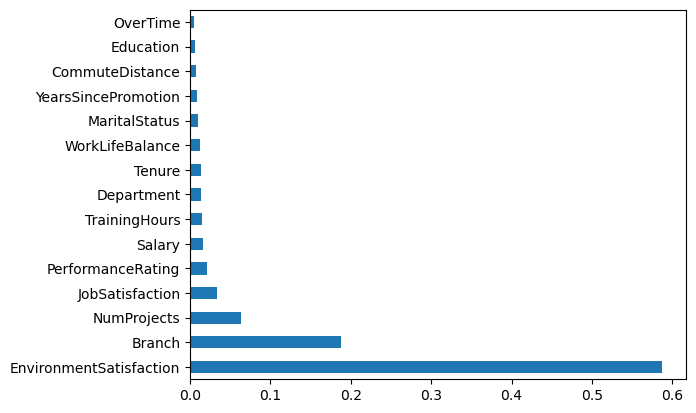

In [78]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(22).plot(kind='barh')
plt.show()

In [79]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)
#tp fp
#fn tn

array([[169,   2,   0],
       [  5, 121,   0],
       [  0,   1,   9]], dtype=int64)

In [80]:
#unique_labels = pd.Series(df['ChurnLikelihood']).unique()

# Print the unique class labels
#print("Unique Class Labels:", unique_labels)


In [81]:
#unique_labels_list = list(unique_labels)
#print("Unique Class Labels (as List):", unique_labels_list)


# Now i will try to do oversampling to our data so the target class will be balanced.

# OverSampling Data
Using Smote Algorithm

In [83]:
desired_samples_A = int(1 * len(df[df["ChurnLikelihood"] == 0]))
desired_samples_B = int(1 * len(df[df["ChurnLikelihood"] == 1]))
desired_samples_C = int(1 * len(df[df["ChurnLikelihood"] == 2]))

print("Desired Minority Samples for Class A:", desired_samples_A)
print("Desired Minority Samples for Class B:", desired_samples_B)
print("Desired Minority Samples for Class C:", desired_samples_C)


Desired Minority Samples for Class A: 880
Desired Minority Samples for Class B: 623
Desired Minority Samples for Class C: 32


In [84]:
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE with the desired sampling strategy
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE to generate synthetic samples
X_resampled, y_resampled = smote.fit_resample(X, y)

In [85]:
y_resampled.value_counts()

0    880
1    880
2    880
Name: ChurnLikelihood, dtype: int64

In [86]:
df2 = pd.concat([X_resampled, y_resampled], axis=1, join='inner')
df2

Branch  Tenure  Salary  Department  JobSatisfaction  WorkLifeBalance  \
0          9       4   63000           6                3                3   
1          2      14   72000           0                4                4   
2          6       4   40000          12                3                3   
3         10       2   55000           6                3                3   
4         10      10   55500           6                3                3   
...      ...     ...     ...         ...              ...              ...   
2635       7       6   74699          13                4                3   
2636       9      11   77500           3                4                4   
2637       7       3   70265          13                4                3   
2638       2       9   69261          12                4                3   
2639       9       9   64691          12                3                4   

      CommuteDistance  MaritalStatus  Education  PerformanceRating  \
0                   0              1          1                  3   
1                   2              2          0                  3   
2                   1              2          1                  3   
3                   2              1          0                  3   
4                   1              1          0                  3   
...               ...            ...        ...                ...   
2635                1              1          0                  3   
2636                0              0          0                  3   
2637                0              0          0                  3   
2638                1              1          0                  3   
2639                1              1          0                  4   

      TrainingHours  OverTime  NumProjects  YearsSincePromotion  \
0                88         1            3                    0   
1                30         1            3                    2   
2                64         0            0                    0   
3                30         1            4                    0   
4                18         0            4                    1   
...             ...       ...          ...                  ...   
2635              9         1            2                    0   
2636             11         1            4                    3   
2637             26         1            2                    0   
2638             43         1            3                    1   
2639             72         1            4                    0   

      EnvironmentSatisfaction  ChurnLikelihood  
0                           2                0  
1                           3                1  
2                           4                0  
3                           3                1  
4                           3                1  
...                       ...              ...  
2635                        4                2  
2636                        4                2  
2637                        4                2  
2638                        3                2  
2639                        4                2  

[2640 rows x 16 columns]

In [87]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Branch                   2640 non-null   int32
 1   Tenure                   2640 non-null   int32
 2   Salary                   2640 non-null   int32
 3   Department               2640 non-null   int32
 4   JobSatisfaction          2640 non-null   int32
 5   WorkLifeBalance          2640 non-null   int32
 6   CommuteDistance          2640 non-null   int32
 7   MaritalStatus            2640 non-null   int32
 8   Education                2640 non-null   int32
 9   PerformanceRating        2640 non-null   int32
 10  TrainingHours            2640 non-null   int32
 11  OverTime                 2640 non-null   int64
 12  NumProjects              2640 non-null   int32
 13  YearsSincePromotion      2640 non-null   int32
 14  EnvironmentSatisfaction  2640 non-null   int32
 15  Chur

In [88]:
df2.shape

(2640, 16)

In [90]:
df2.describe()

Branch       Tenure        Salary   Department  JobSatisfaction  \
count  2640.000000  2640.000000   2640.000000  2640.000000      2640.000000   
mean      5.643939     7.604924  67047.564773     7.556439         3.587121   
std       3.135521     3.667857   7809.637190     4.565119         0.963912   
min       0.000000     0.000000  40000.000000     0.000000         1.000000   
25%       3.000000     5.000000  62002.250000     3.000000         3.000000   
50%       6.000000     7.000000  67500.000000     8.000000         4.000000   
75%       8.000000    10.000000  72201.000000    12.000000         4.000000   
max      11.000000    24.000000  88000.000000    14.000000         5.000000   

       WorkLifeBalance  CommuteDistance  MaritalStatus    Education  \
count      2640.000000      2640.000000    2640.000000  2640.000000   
mean          3.460227         0.885227       0.861364     0.364773   
std           0.547765         0.741818       0.661637     0.581945   
min           2.000000         0.000000       0.000000     0.000000   
25%           3.000000         0.000000       0.000000     0.000000   
50%           3.000000         1.000000       1.000000     0.000000   
75%           4.000000         1.000000       1.000000     1.000000   
max           5.000000         2.000000       2.000000     2.000000   

       PerformanceRating  TrainingHours     OverTime  NumProjects  \
count        2640.000000    2640.000000  2640.000000  2640.000000   
mean            3.187121      33.433333     0.907576     3.392803   
std             0.479817      20.193853     0.289679     1.165317   
min             1.000000       5.000000     0.000000     0.000000   
25%             3.000000      18.000000     1.000000     3.000000   
50%             3.000000      30.000000     1.000000     4.000000   
75%             3.000000      40.000000     1.000000     4.000000   
max             5.000000      96.000000     1.000000     6.000000   

       YearsSincePromotion  EnvironmentSatisfaction  ChurnLikelihood  
count          2640.000000              2640.000000      2640.000000  
mean              0.996212                 2.986364         1.000000  
std               1.677929                 0.873488         0.816651  
min               0.000000                 1.000000         0.000000  
25%               0.000000                 2.000000         0.000000  
50%               0.000000                 3.000000         1.000000  
75%               2.000000                 4.000000         2.000000  
max              16.000000                 5.000000         2.000000

Text(0.5, 1.0, 'Boxplot for Each Column')

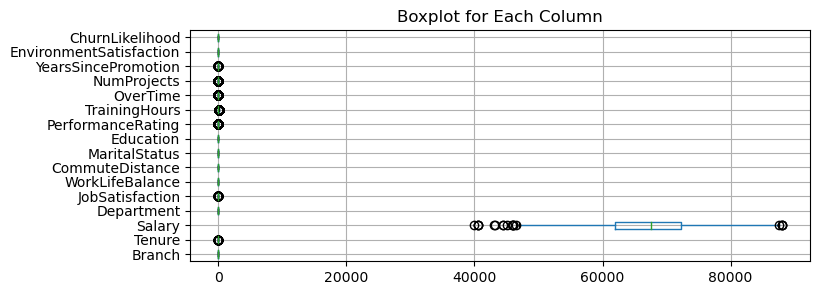

In [91]:
plt.figure(figsize=(8, 3)) 
df2.boxplot(vert=False) 
plt.title('Boxplot for Each Column')

In [92]:
Q1 = df2['Salary'].quantile(0.25)
Q3 = df2['Salary'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
outliers = df2[df2['Salary'] > upper_bound]
print(upper_bound)

# Remove outliers from the DataFrame
df2 = df2[df2['Salary'] <= upper_bound]


87499.125


In [93]:
df2.describe()

Branch       Tenure        Salary   Department  JobSatisfaction  \
count  2636.000000  2636.000000   2636.000000  2636.000000      2636.000000   
mean      5.640364     7.589150  67015.960167     7.555008         3.586495   
std       3.136313     3.647153   7773.252541     4.565734         0.963721   
min       0.000000     0.000000  40000.000000     0.000000         1.000000   
25%       3.000000     5.000000  62000.000000     3.000000         3.000000   
50%       6.000000     7.000000  67500.000000     8.000000         4.000000   
75%       8.000000    10.000000  72065.250000    12.000000         4.000000   
max      11.000000    24.000000  87485.000000    14.000000         5.000000   

       WorkLifeBalance  CommuteDistance  MaritalStatus    Education  \
count      2636.000000      2636.000000    2636.000000  2636.000000   
mean          3.460546         0.885432       0.861153     0.365326   
std           0.547860         0.742170       0.661544     0.582213   
min           2.000000         0.000000       0.000000     0.000000   
25%           3.000000         0.000000       0.000000     0.000000   
50%           3.000000         1.000000       1.000000     0.000000   
75%           4.000000         1.000000       1.000000     1.000000   
max           5.000000         2.000000       2.000000     2.000000   

       PerformanceRating  TrainingHours     OverTime  NumProjects  \
count        2636.000000    2636.000000  2636.000000   2636.00000   
mean            3.187026      33.447269     0.907436      3.39264   
std             0.479878      20.203966     0.289876      1.16603   
min             1.000000       5.000000     0.000000      0.00000   
25%             3.000000      18.000000     1.000000      3.00000   
50%             3.000000      30.000000     1.000000      4.00000   
75%             3.000000      40.000000     1.000000      4.00000   
max             5.000000      96.000000     1.000000      6.00000   

       YearsSincePromotion  EnvironmentSatisfaction  ChurnLikelihood  
count          2636.000000              2636.000000      2636.000000  
mean              0.988998                 2.987102         1.000379  
std               1.667263                 0.873728         0.817039  
min               0.000000                 1.000000         0.000000  
25%               0.000000                 2.000000         0.000000  
50%               0.000000                 3.000000         1.000000  
75%               1.250000                 4.000000         2.000000  
max              16.000000                 5.000000         2.000000

Text(0.5, 1.0, 'Boxplot for Each Column')

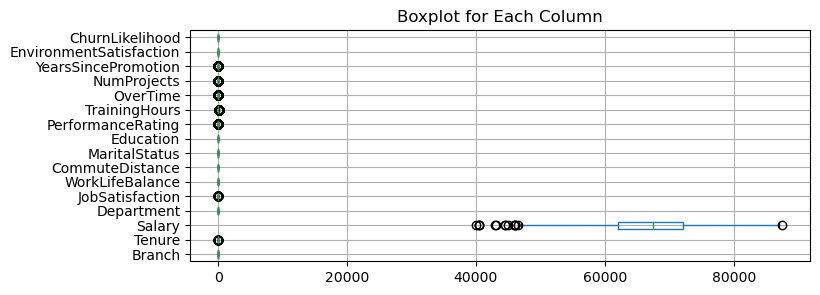

In [94]:
plt.figure(figsize=(8, 3)) 
df2.boxplot(vert=False) 
plt.title('Boxplot for Each Column')

In [95]:
X = df2.drop(['ChurnLikelihood'], axis=1)
y = df2['ChurnLikelihood']

In [96]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [97]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression on OverSampled Data

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.8939393939393939
              precision    recall  f1-score   support

           0       0.91      0.85      0.88       176
           1       0.84      0.87      0.85       176
           2       0.93      0.96      0.95       176

    accuracy                           0.89       528
   macro avg       0.89      0.89      0.89       528
weighted avg       0.89      0.89      0.89       528



# KNN Classifier on OverSampled Data

In [99]:
from sklearn.neighbors import KNeighborsClassifier
k=5
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(classification_report(y_test, y_pred))

Accuracy: 0.8314393939393939
              precision    recall  f1-score   support

           0       0.82      0.72      0.77       176
           1       0.76      0.77      0.76       176
           2       0.91      1.00      0.95       176

    accuracy                           0.83       528
   macro avg       0.83      0.83      0.83       528
weighted avg       0.83      0.83      0.83       528



# DecisionTreeClassifier on oversampled Data¶

In [100]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

dt_classifier = DecisionTreeClassifier()

param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

best_dt_model = grid_search.best_estimator_
y_pred = best_dt_model.predict(X_test)

train_accuracy = best_dt_model.score(X_train, y_train)
print("Training Set Accuracy:", train_accuracy)

test_accuracy = best_dt_model.score(X_test, y_test)
print("Testing Set Accuracy:", test_accuracy)

print(classification_report(y_test, y_pred))

Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}
Training Set Accuracy: 0.9378557874762808
Testing Set Accuracy: 0.9185606060606061
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       179
           1       0.89      0.89      0.89       177
           2       0.96      0.93      0.95       172

    accuracy                           0.92       528
   macro avg       0.92      0.92      0.92       528
weighted avg       0.92      0.92      0.92       528



# RandomForestClassifier with GridSearchCV OverSampled Data¶
Using different possible Hyperparameters

In [101]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

rf_classifier = RandomForestClassifier(random_state=42)

In [102]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [103]:
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [104]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [105]:
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

best_model = grid_search.best_estimator_
train_accuracy = best_model.score(X_train, y_train)
print("Training Set Accuracy:", train_accuracy)

test_accuracy = best_model.score(X_test, y_test)
print("Testing Set Accuracy:", test_accuracy)

print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy}')

Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Accuracy: 0.9468642703560693
Training Set Accuracy: 1.0
Testing Set Accuracy: 0.9337121212121212
              precision    recall  f1-score   support

           0       0.93      0.87      0.90       179
           1       0.89      0.93      0.91       177
           2       0.98      1.00      0.99       172

    accuracy                           0.93       528
   macro avg       0.93      0.93      0.93       528
weighted avg       0.93      0.93      0.93       528

Accuracy: 0.9337121212121212


In [106]:
model = RandomForestClassifier()  

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [107]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Best Model Accuracy: {accuracy}')

Best Model Accuracy: 0.9337121212121212


In [108]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)
#tp fp
#fn tn

array([[157,  20,   2],
       [ 11, 165,   1],
       [  0,   1, 171]], dtype=int64)

# XGBoost with GridSearchCV on OverSampled Data
Using possible Hyperparameters

In [109]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

xgb_classifier = XGBClassifier(random_state=42)

param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 400],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3],
}

In [110]:
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [111]:
y_pred = best_model.predict(X_test)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

best_model = grid_search.best_estimator_
train_accuracy = best_model.score(X_train, y_train)
print("Training Set Accuracy:", train_accuracy)

test_accuracy = best_model.score(X_test, y_test)
print("Testing Set Accuracy:", test_accuracy)

print(classification_report(y_test, y_pred))

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 400}
Best Accuracy: 0.9582533124697459
Accuracy: 0.9507575757575758
Training Set Accuracy: 0.9962049335863378
Testing Set Accuracy: 0.9507575757575758
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       179
           1       0.94      0.93      0.93       177
           2       0.97      0.99      0.98       172

    accuracy                           0.95       528
   macro avg       0.95      0.95      0.95       528
weighted avg       0.95      0.95      0.95       528



In [113]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)
#tp fp
#fn tn

array([[167,  10,   2],
       [ 10, 164,   3],
       [  0,   1, 171]], dtype=int64)

In [112]:
import pickle 
from joblib import dump, load

In [115]:
import pickle

with open('C:\BIA\Spinnaker Projects/model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [116]:
with open('C:\BIA\Spinnaker Projects/model.pkl', 'rb') as file:
    model = pickle.load(file)


In [117]:
pickle.dump(scaler, open("C:\BIA\Spinnaker Projects/scaler.pickle", "wb"))
sc = pickle.load(open("C:\BIA\Spinnaker Projects/scaler.pickle", "rb"))

In [120]:
sample = sc.transform([X_test.iloc[0]])
sample


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



array([[ 1.36696238,  0.64209337, -1.47461779, -0.34354145, -0.60841127,
        -0.83169761,  0.16640671,  0.21244423, -0.62696143, -0.40810727,
        -0.75767653, -3.14996505,  0.52899768, -0.00831068,  0.02115482]])

In [122]:
from sklearn.ensemble import RandomForestClassifier

model.fit(X_train, y_train)

model.predict(sample)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



array([1])

In [124]:
y_test.iloc[0]

1